**Linear Regression**<br>
By: Laksh Patel<br><br>

**Prerequisites:**<br>
Facility in Linear Algebra<br>
Understanding of Numerical Analysis (Machine Epsilon, Big O notation, Floating Point Error) <br><br>

**Definitions:**<br>
$A$ is $m$ by $n$ matrix which contains the variables to best fit the observed values $b$. The $m$ rows contain all data points. The columns $n$ contain all features. <br><br>

**Food for Thought:**<br>
In search of a coefficent vector $x$ that satisfies $Ax=b$, we may realize that there exists no such $x$. This is because $b \not\in C(A)$. Often times, in real-world scenarios, this is true. Generally, when $A$ is over-determined ($m > n$), it has no solution $x$. Because the $x$ does not exist, we must instead look for the closest vector $b$ that allows the existance of an $x$. To do that, we must set $b'=\mathrm{proj}_{C(A)}(b)$. There exists many ways of solving for the $x$ that satisfies $Ax = b'$, but some depend on the characteristics of $A$ and the precision of work. Also, directly computing the projection is extremely numerically unstable.

If $A$ is full rank, then multiplying  $A^T$ on both sides, yielding $A^TAx=A^Tb$, provides a simple way of calculating for $x$, but it is not numerically stable. This is because when squaring small terms when computing $A^TA$, you may approach machine epsilon. 

Still considering the case of $A$ being full rank, we can utilize $QR$ factorization for a numerically stable solution (Q is orthogonal). 
$$A = QR \\
Ax = b\\
QRx = b\\
Rx = Q^Tb 
$$
$Q^T \times b$ is numerically stable because $Q^T$ does not scale the space. Utilizing back-substitution, you can solve for $x$ with $R$ in $\textit{O}(n^2)$ time. <br><br>
**SVD's Application in Linear Regression:**<br>
In many applications, however; $A$ <strong>won't have linearly independent columns</strong> or <strong>be square</strong>. This provides way for another way of finding an $x$ that solves $Ax=b'$. Singular Value Decomposition (abbreviated to SVD) isolates the orthogonal directions of variance, so it is particularly useful for data reduction. We can view the following insights: 
$$svd(A) = A = U\Sigma V^T$$
$$U,V \text{ are unitary, so } \quad U^T = U^{-1} \quad \& \quad V^T = V^{-1}$$

We can construct the psuedo-inverse $A^+$, by rewriting $A$.

$$A = U\Sigma V^T \quad \& \quad Ax=b$$
$$U\Sigma V^Tx = b$$
$$\underbrace{V\Sigma^-1U^TU\Sigma V^T}_{I}x=V\Sigma^-1U^Tb$$
$$x=\underbrace{V\Sigma^-1U^T}_{A^+}b$$
$$x=A^+b$$
In doing this, we have inversed $\Sigma$, which has only diaganol entries $\sigma_i$. This makes the inverse computationally inexpensive and numerically stable. The fact that $U,V$ are unitary makes their indivisual inverse computation trivial as it is simply taking their respective transpose. So, this makes a psuedo-inverse of both singular and non-singular matrices. In practice, this is numerically stable and has application to matrices of all sizes. 





In [92]:

import numpy as np
b = [5,4,3,2,6] #known outputs

A = np.array([[1, 11], #this includes a column of 1's to act as an intercept which remains constant; the other columns are known inputs
            [1, 89],
            [1, 213],
            [1, 135],
            [1, 1253]])
U,s,Vt = np.linalg.svd(A) # A = U\Sigma V^T
# s is the (lowercase) sigma values; we must construct a matrix with those as diaganols and zeros to match dimensions

S = np.diag(s) #lets ensure that S has the same amount of rows as U does columns

UColumns = U.shape[1]
SRows = S.shape[0]
SCols = S.shape[1]
S_inv = np.linalg.inv(np.diag(s))

if UColumns > SRows: # this adds to S rows if needed to match dimensions of U
    newrowlength = SCols
    newrow = []
    for i in range(0,newrowlength):
        newrow.append(0)
    for j in range(0, (UColumns - SRows)):
        S = np.append(S, [newrow], axis=0)
        S_inv = np.append(S_inv, [newrow], axis=0)
        
S_inv = S_inv.T #Computes S inverse by adding the zero rows; then transposing after

A_psuedoinverse = Vt.T @ S_inv @ U.T
x_sol =  A_psuedoinverse @ b  #x=A^+ b

print(x_sol)


[3.34902191e+00 1.91351586e-03]


[3.34902191e+00 1.91351586e-03]


C:\Users\Laksh Patel\AppData\Local\Temp\ipykernel_20472\1449083689.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


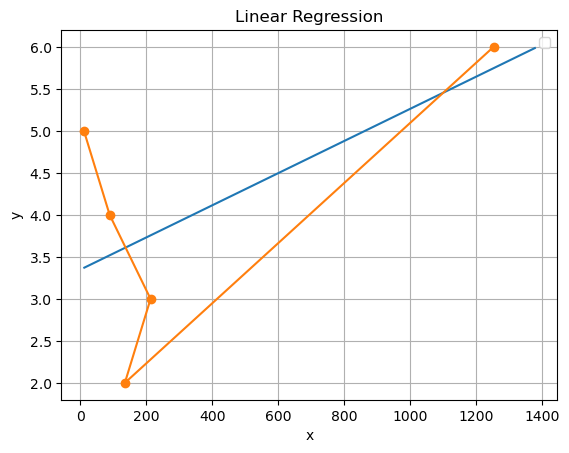

In [ ]:
import matplotlib.pyplot as plt


# Generate a range of x-values
x_values = np.linspace(-min(A[:,1]) * -1.1, 1.1 * max(A[:,1]), 100) # 100 points between 1.1 times the minimum and maximum
print(x_sol)
y_values = x_sol[1] * x_values + x_sol[0] # writes the solution vector x in the linear system

# Plot the line
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.grid(True)
plt.legend()
plt.plot(A[:, 1], b,marker='o')
plt.show()